# Backpropagation and Multilayer Neural Networks

### Goals: 
- Intro: train a neural network with high level framework `Keras`
- Diving deep: implement a real gradient descent in `Numpy`
- Auto-differentiation: the basics of `TensorFlow`

### Dataset:
- Digits: 10 class handwritten digits
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [16]:
%matplotlib inline 
# display figures in the notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

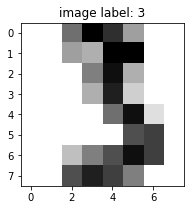

In [17]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

### Preprocessing

- normalization
- train/test split

In [18]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(scaler.mean_)
# print(scaler.scale_)

Let's display the one of the transformed sample (after feature standardization):

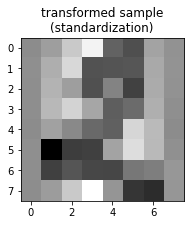

In [19]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

The scaler objects makes it possible to recover the original sample:

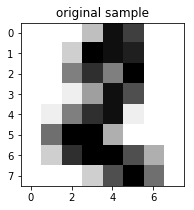

In [20]:
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1527, 64) (1527,)
(270, 64) (270,)


# I) Feed Forward NN with Keras

Objectives of this section:

- Build and train a first feedforward network using `Keras`
    - https://keras.io/getting-started/sequential-model-guide/
- Experiment with different optimizers, activations, size of layers, initializations

### a) Keras Workflow

To build a first neural network we need to turn the target variable into a vector "one-hot-encoding" representation. Here are the labels of the first samples in the training set encoded as integers:

In [22]:
y_train[:3]

array([2, 9, 5])

Keras provides a utility function to convert integer-encoded categorical variables as one-hot encoded values:

In [23]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

We can now build an train a our first feed forward neural network using the high level API from keras:

- first we define the model by stacking layers with the right dimensions
- then we define a loss function and plug the SGD optimizer
- then we feed the model the training data for fixed number of epochs

In [24]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

N = X_train.shape[1]
H = 100
K = 10

model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 0.9141 - acc: 0.7597     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.2931 - acc: 0.9456     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.1996 - acc: 0.9555     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.1551 - acc: 0.9692     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.1288 - acc: 0.9745     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.1096 - acc: 0.9784     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.0961 - acc: 0.9830     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.0848 - acc: 0.9856     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0766 - acc: 0.9882     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0695 - acc: 0.9902     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

### b) Exercises: Impact of the Optimizer

- Try to decrease the learning rate value by 10 or 100. What do you observe?

- Try to increase the learning rate value to make the optimization diverge.

- Configure the SGD optimizer to enable a Nesterov momentum of 0.9
  
Note that the keras API documentation is avaiable at:

https://keras.io/

It is also possible to learn more about the parameters of a class by using the question mark: type and evaluate:

```python
optimizers.SGD?
```

in a jupyter notebook cell.

#### Influence of the learning rate

$\eta = 0.01$

In [25]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.01),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 1.8089 - acc: 0.3857     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 1.2268 - acc: 0.6785     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.9290 - acc: 0.7773     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.7570 - acc: 0.8291     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.6444 - acc: 0.8579     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.5648 - acc: 0.8782     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.5049 - acc: 0.8933     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.4584 - acc: 0.9037     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.4206 - acc: 0.9129     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.3894 - acc: 0.9214     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

$\eta = 0.001$

In [26]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 2.7782 - acc: 0.0681     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 2.6194 - acc: 0.0917     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 2.4711 - acc: 0.1205     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 2.3330 - acc: 0.1598     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 2.2046 - acc: 0.1965     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 2.0853 - acc: 0.2600     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 1.9750 - acc: 0.3209     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 1.8731 - acc: 0.3752     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 1.7791 - acc: 0.4355     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 1.6924 - acc: 0.4892     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 1

Affichons les courbes de pertes pour plusieurs valeurs de $\eta$

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 6.6128 - acc: 0.5331     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 5.7482 - acc: 0.6359     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 5.0960 - acc: 0.6817     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 5.2821 - acc: 0.6686     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 5.4794 - acc: 0.6582     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 8.1112 - acc: 0.4951     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 7.7877 - acc: 0.5154     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 7.5270 - acc: 0.5324     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 8.1514 - acc: 0.4938     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 7.1898 - acc: 0.5527     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 5

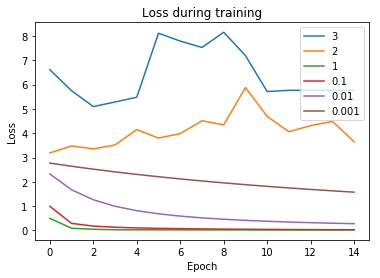

In [27]:
import time
def train_lr(lr):
    ############ Define dimensions of layers engaged in the neural network ##########
    N = X_train.shape[1]
    H = 100
    K = 10

    ######### Build the graph #########
    model = Sequential()
    model.add(Dense(H, input_dim=N))
    model.add(Activation('relu')) 
    model.add(Dense(K))
    model.add(Activation("softmax"))

    ############ Assign the graph with an optimizer, a olss function and a metric #######
    model.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    ########### Fit the previously defined model on the train set ##############
    start = time.time()
    history = model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)
    exec_time = time.time() - start
    
    return history

# Compute for several learning rates
learning = [3, 2, 1, 0.1, 0.01, 0.001]
histories = {}
for rate in learning:
    histories[rate] = train_lr(rate)

# Plot the result
t = np.arange(0, 15)
for rate in learning:
    plt.plot(t, histories[rate].history['loss'], label=rate)
plt.legend()
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

On remarque que plus on diminue la valeur de $\eta$ et plus la fonction de perte diminue lentement au fil des epochs. Ainsi, pour un nombre d'epochs fixé, si l'on divise le taux d'apprentissage originel par 10, puis par 100, on diminue la perte finale et par conséquent, la précision associée. Il y a en effet un arbitrage à effectuer sur la valeur de $\eta$.

Essayons de faire diverger l'étape d'optimisation:

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 13.0582 - acc: 0.1722     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 12.6454 - acc: 0.2155     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 12.6454 - acc: 0.2155     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 12.6454 - acc: 0.2155     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 12.6454 - acc: 0.2155     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 12.6454 - acc: 0.2155     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 12.6454 - acc: 0.2155     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 12.6454 - acc: 0.2155     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 12.6454 - acc: 0.2155     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 12.6454 - acc: 0.2155     
Epoch 11/15
1527/1527 [==============================] - 0s

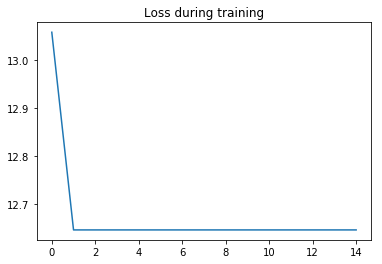

In [30]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=1000),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)
plt.plot(history.history['loss'])
plt.title('Loss during training')
plt.show()

Après plusieurs essais, on voit qu'il est difficile de faire diverger cette étape. Le "mieux" que l'on puisse faire, en augmentant le taux d'apprentissage (jusqu'à 1000 par exemple) est de bloquer l'optimisation au bout d'un moment, car l'algorithme devient trop imprécis pour converger efficacement.

#### Nesterov momentum of 0.9

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 0.3779 - acc: 0.8900     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.0860 - acc: 0.9758     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.0391 - acc: 0.9895     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.0182 - acc: 0.9980     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.0104 - acc: 1.0000     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.0075 - acc: 1.0000     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.0059 - acc: 1.0000     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.0050 - acc: 1.0000     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0042 - acc: 1.0000     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0037 - acc: 1.0000     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

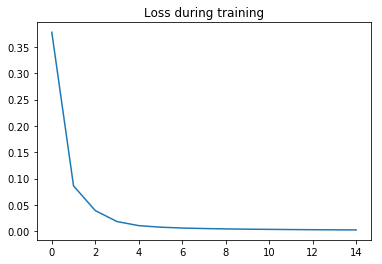

In [31]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1,nesterov=True,momentum=0.9),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)
plt.plot(history.history['loss'])
plt.title('Loss during training')
plt.show()

On constate ici que l'optimisation est non seulement plus rapide, mais aussi plus efficace, car elle permet d'atteindre une perte de 2.2e-3 au bout de 15 epochs (précision de 1 sur le train set). C'est conforme à ce à quoi on pouvait s'attendre.

Comparons les convergences pour quelques valeurs du momentum :

Epoch 1/15
1527/1527 [==============================] - 1s - loss: 1.2058 - acc: 0.6523     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.2951 - acc: 0.9325     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.1759 - acc: 0.9594     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.1274 - acc: 0.9731     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.1001 - acc: 0.9817     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.0823 - acc: 0.9849     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.0692 - acc: 0.9882     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.0593 - acc: 0.9908     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0516 - acc: 0.9948     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0455 - acc: 0.9961     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

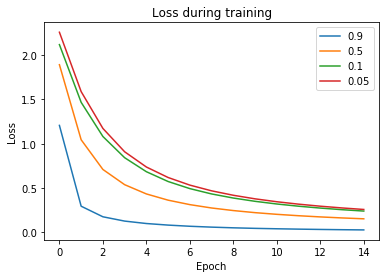

In [42]:
def train_nesterov(moementum):
    ############ Define dimensions of layers engaged in the neural network ##########
    N = X_train.shape[1]
    H = 100
    K = 10

    ######### Build the graph #########
    model = Sequential()
    model.add(Dense(H, input_dim=N))
    model.add(Activation('relu')) 
    model.add(Dense(K))
    model.add(Activation("softmax"))

    ############ Assign the graph with an optimizer, a olss function and a metric #######
    model.compile(optimizer=optimizers.SGD(nesterov=True, momentum=momentum),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    ########### Fit the previously defined model on the train set ##############
    start = time.time()
    history = model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)
    exec_time = time.time() - start
    
    return history

momentums = [0.9, 0.5, 0.1, 0.05]
histories = {}
for momentum in momentums:
    histories[momentum] = train_nesterov(momentum)
    
t = np.arange(0, 15)
for momentum in momentums:
    plt.plot(t, histories[momentum].history['loss'], label=momentum)
plt.legend()
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [32]:
# %load solutions/keras_sgd_and_momentum.py

- Replace the SGD optimizer by the Adam optimizer from keras and run it
  with the default parameters.

- Add another hidden layer and use the "Rectified Linear Unit" for each
  hidden layer. Can you still train the model with Adam with its default global
  learning rate?

- Bonus: try the Adadelta optimizer (no learning rate to set).

Hint: use `optimizers.<TAB>` to tab-complete the list of implemented optimizers in Keras.

#### Adam optimizer

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 1.4050 - acc: 0.5914     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.5546 - acc: 0.8743     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.3411 - acc: 0.9352     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.2457 - acc: 0.9542     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.1899 - acc: 0.9705     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.1548 - acc: 0.9745     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.1309 - acc: 0.9797     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.1127 - acc: 0.9823     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0977 - acc: 0.9849     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0868 - acc: 0.9869     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

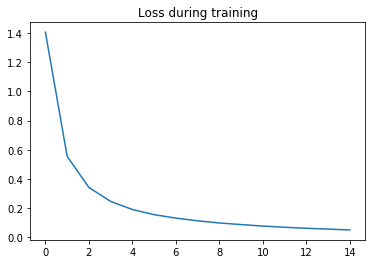

In [34]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)
plt.plot(history.history['loss'])
plt.title('Loss during training')
plt.show()

Ici, Adam semble légèrement moins performant que le SGD classique (et nettement moins que le SGD avec Nesterov's momentum).

Epoch 1/15
1527/1527 [==============================] - 1s - loss: 2.3057 - acc: 0.1925     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 1.6729 - acc: 0.5370     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 1.2608 - acc: 0.7217     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.9909 - acc: 0.8055     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.8085 - acc: 0.8435     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.6801 - acc: 0.8723     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.5859 - acc: 0.8893     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.5141 - acc: 0.9077     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.4579 - acc: 0.9201     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.4126 - acc: 0.9299     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

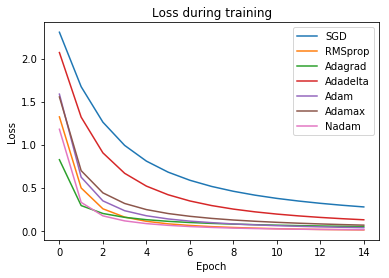

In [35]:
def train_optimizer(optimizer):
    ############ Define dimensions of layers engaged in the neural network ##########
    N = X_train.shape[1]
    H = 100
    K = 10

    ######### Build the graph #########
    model = Sequential()
    model.add(Dense(H, input_dim=N))
    model.add(Activation('relu')) 
    model.add(Dense(K))
    model.add(Activation("softmax"))

    ############ Assign the graph with an optimizer, a olss function and a metric #######
    model.compile(optimizer=optimizers.__dict__[optimizer](),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    ########### Fit the previously defined model on the train set ##############
    start = time.time()
    history = model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)
    exec_time = time.time() - start
    
    return history

optims = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
histories = {}
for optim in optims:
    histories[optim] = train_optimizer(optim)
    
t = np.arange(0, 15)

for optim in optims:
    plt.plot(t, histories[optim].history['loss'], label=optim)

plt.legend()
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

En comparant tous les optimiseurs, on se rend compte que SGD est le moins performant. Adadelta converge plus rapidement que SGD, mais Adam reste l'optimiseur de choix dans cet exemple.

#### RELU + ajout d'une couche cachée

Epoch 1/15
1527/1527 [==============================] - 1s - loss: 1.4619 - acc: 0.6045     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.3881 - acc: 0.9064     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.1698 - acc: 0.9587     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.1057 - acc: 0.9777     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.0726 - acc: 0.9849     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.0509 - acc: 0.9921     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.0366 - acc: 0.9954     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.0270 - acc: 0.9967     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0200 - acc: 0.9993     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0159 - acc: 0.9993     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

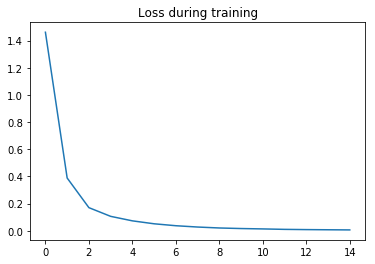

In [36]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(H))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)
plt.plot(history.history['loss'])
plt.title('Loss during training')
plt.show()

En rajoutant une couche cachée et en changeant les fonctions d'activation en RELU, on constate qu'on améliore la précision à la fin de l'étape d'optimisation. Conserver les paramètres par défaut d'Adam ne semble pas poser de problème.

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 1.0185 - acc: 0.7223     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.2993 - acc: 0.9437     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.1828 - acc: 0.9633     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.1338 - acc: 0.9810     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.1056 - acc: 0.9817     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.0868 - acc: 0.9856     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.0730 - acc: 0.9882     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.0623 - acc: 0.9915     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0543 - acc: 0.9941     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0477 - acc: 0.9954     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

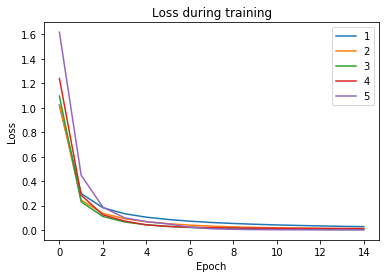

In [37]:
def train_layers(layer_number):
    ############ Define dimensions of layers engaged in the neural network ##########
    N = X_train.shape[1]
    H = 100
    K = 10

    ######### Build the graph #########
    model = Sequential()
    
    ########### Build the different layers #######"
    for i in range(layer_number):
        if i == 0:
            model.add(Dense(H, input_dim=N))
            model.add(Activation('relu'))
        else:
            model.add(Dense(H, input_dim=H))
            model.add(Activation('relu'))
            
    ####### Build output activation layer #########
    model.add(Dense(K))
    model.add(Activation("softmax"))

    ############ Assign the graph with an optimizer, a olss function and a metric #######
    model.compile(optimizer=optimizers.SGD(lr=0.1),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    ########### Fit the previously defined model on the train set ##############
    start = time.time()
    history = model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)
    exec_time = time.time() - start
    
    return history

layer_number = [1, 2, 3, 4, 5]
histories = {}
for number in layer_number:
    histories[number] = train_layers(number)
    
t = np.arange(0, 15)
for number in layer_number:
    plt.plot(t, histories[number].history['loss'], label=number)
plt.legend()
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

On remarque que, bien que les réseaux à plus de 1 seule couche semblent converger plus vite, la différence n'est pas flagrante.

#### Influence du nombre de neurones dans la couche cachée (une seule couche cachée)

Epoch 1/15
1527/1527 [==============================] - 1s - loss: 1.0314 - acc: 0.7210     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.3419 - acc: 0.9194     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.2110 - acc: 0.9535     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.1535 - acc: 0.9640     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.1200 - acc: 0.9784     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.0996 - acc: 0.9784     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.0844 - acc: 0.9836     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.0726 - acc: 0.9862     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0636 - acc: 0.9908     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0563 - acc: 0.9928     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

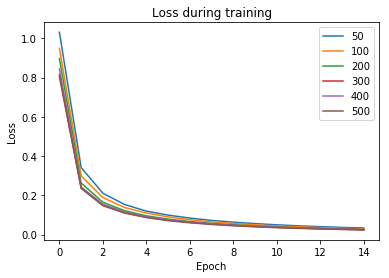

In [38]:
def train_neuron_number(H):
    ############ Define dimensions of layers engaged in the neural network ##########
    N = X_train.shape[1]
    K = 10

    ######### Build the graph #########
    model = Sequential()
    model.add(Dense(H, input_dim=N))
    model.add(Activation('relu'))
    model.add(Dense(K))
    model.add(Activation("softmax"))

    ############ Assign the graph with an optimizer, a olss function and a metric #######
    model.compile(optimizer=optimizers.SGD(lr=0.1),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    ########### Fit the previously defined model on the train set ##############
    start = time.time()
    history = model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)
    exec_time = time.time() - start
    
    return history

layer_size = [50, 100, 200, 300, 400, 500]
histories = {}
for size in layer_size:
    histories[size] = train_neuron_number(size)
    
t = np.arange(0, 15)
for size in layer_size:
    plt.plot(t, histories[size].history['loss'], label=size)
plt.legend()
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Plus il y a de neurones dans une couche, plus la convergence est rapide.

#### Influence de la fonction d'activation

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 0.9686 - acc: 0.7531     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.2861 - acc: 0.9515     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.1774 - acc: 0.9659     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.1318 - acc: 0.9771     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.1044 - acc: 0.9817     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.0855 - acc: 0.9869     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.0719 - acc: 0.9902     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.0623 - acc: 0.9921     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0545 - acc: 0.9921     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0481 - acc: 0.9948     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

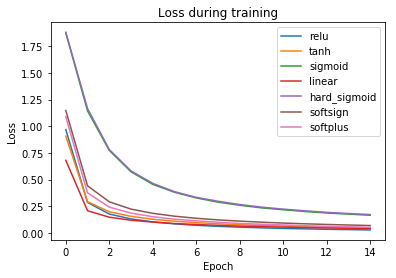

In [39]:
def train_neural_activation(activation):
    ############ Define dimensions of layers engaged in the neural network ##########
    N = X_train.shape[1]
    H = 100
    K = 10

    ######### Build the graph #########
    model = Sequential()
    model.add(Dense(H, input_dim=N))
    model.add(Activation(activation))
    model.add(Dense(K))
    model.add(Activation("softmax"))

    ############ Assign the graph with an optimizer, a olss function and a metric #######
    model.compile(optimizer=optimizers.SGD(lr=0.1),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    ########### Fit the previously defined model on the train set ##############
    start = time.time()
    history = model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)
    exec_time = time.time() - start
    
    return history

activations = ['relu', 'tanh', 'sigmoid', 'linear', 'hard_sigmoid', 'softsign', 'softplus']
histories = {}
for activ in activations:
    histories[activ] = train_neural_activation(activ)
    
t = np.arange(0, 15)
for activ in activations:
    plt.plot(t, histories[activ].history['loss'], label=activ)
plt.legend()
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

On remarque que la fonction sigmoid performe beaucoup moins bien que la plupart des autres fonctions d'activation.

Remarques pour Adadelta (issues de la correction) :

In [19]:
# %load solutions/keras_adam_and_adadelta.py
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(H))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))
model.compile(optimizer="adam", loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, nb_epoch=15, batch_size=32)

# Analysis:
#
# Adam with its default global learning rate of 0.001 tends to work
# in many settings often converge as fast or faster than SGD
# with a well tuned learning rate.
#
# Adadelta has no learning rate setting at all
#
# References:
#
# Adadelta: https://arxiv.org/abs/1212.5701
# Adam:     https://arxiv.org/abs/1412.6980

Epoch 1/15
1527/1527 [==============================] - 0s - loss: 1.4076 - acc: 0.6169     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 0.3831 - acc: 0.9162     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 0.1754 - acc: 0.9561     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 0.1055 - acc: 0.9784     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 0.0703 - acc: 0.9869     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 0.0495 - acc: 0.9948     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 0.0357 - acc: 0.9967     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 0.0275 - acc: 0.9987     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 0.0209 - acc: 0.9993     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 0.0168 - acc: 0.9993     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 0

### c) Exercises: forward pass and generalization

- Compute predictions on test set using `model.predict_classes(...)`
- Compute average accuracy of the model on the test set

In [43]:
z=model.predict_classes(X_test)
print('\nLe taux de bien classés sur le test set est de '+str(np.mean(z==y_test)))

256/270 [===========================>..] - ETA: 0s
Le taux de bien classés sur le test set est de 0.992592592593


test acc: 0.9926


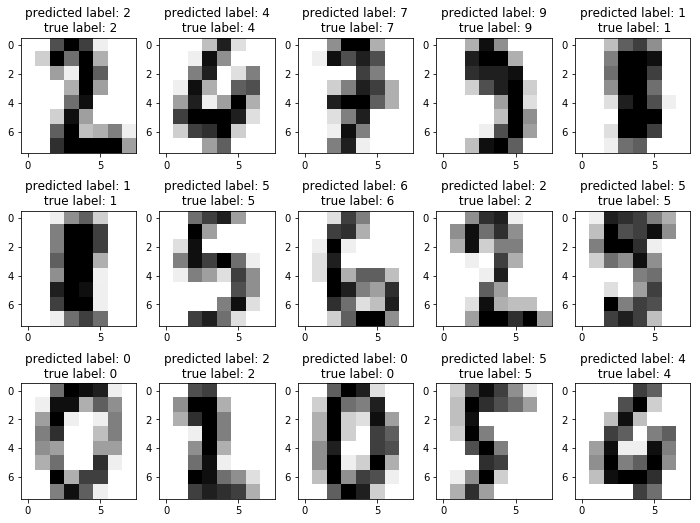

In [44]:
# %load solutions/keras_accuracy_on_test_set.py
y_predicted = model.predict_classes(X_test, verbose=0)

# Let's display the first inputs image, the predicted labels and the true labels
plt.figure(figsize=(12, 9))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(scaler.inverse_transform(X_test[i]).reshape(8, 8),
               cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("predicted label: %d\n true label: %d"
              % (y_predicted[i], y_test[i]))
    
print("test acc: %0.4f" % np.mean(y_predicted == y_test))

- Compute the conditional probabilities of sample number 42 of the test set with `model.predict_proba(...)`
- Derive the loss (negative log likelihood of that sample) using numpy operations
- Compute the average negative log likelihood of the test set.
- Compare this value to the training loss reported by keras: is the model overfitting or underfitting?

Note: you might need to retrain the model with a larger number of epochs (e.g. 50) to ensure that it has fully converged.

In [45]:
# On réentraîne le modèle avec plus d'epochs:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(H))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, nb_epoch=50, batch_size=32)

Epoch 1/50
1527/1527 [==============================] - 1s - loss: 1.4544 - acc: 0.6038     
Epoch 2/50
1527/1527 [==============================] - 0s - loss: 0.3865 - acc: 0.9090     
Epoch 3/50
1527/1527 [==============================] - 0s - loss: 0.1822 - acc: 0.9555     
Epoch 4/50
1527/1527 [==============================] - 0s - loss: 0.1119 - acc: 0.9777     
Epoch 5/50
1527/1527 [==============================] - 0s - loss: 0.0771 - acc: 0.9876     
Epoch 6/50
1527/1527 [==============================] - 0s - loss: 0.0549 - acc: 0.9921     
Epoch 7/50
1527/1527 [==============================] - 0s - loss: 0.0404 - acc: 0.9948     
Epoch 8/50
1527/1527 [==============================] - 0s - loss: 0.0307 - acc: 0.9967     
Epoch 9/50
1527/1527 [==============================] - 0s - loss: 0.0234 - acc: 0.9974     
Epoch 10/50
1527/1527 [==============================] - 0s - loss: 0.0178 - acc: 0.9993     
Epoch 11/50
1527/1527 [==============================] - 0s - loss: 0

In [46]:
#Compute accuracy
z=model.predict_classes(X_test,verbose=0)
print('Le taux de bien classés sur le test set est de '+str(np.mean(z==y_test)))

Le taux de bien classés sur le test set est de 0.985185185185


In [47]:
#Conditional probabilities of sample number 42 of the test set
model.predict_proba(X_test[42,:].reshape(1,-1),verbose=0)

array([[  1.02656756e-07,   2.18838025e-07,   1.59595146e-08,
          4.44434463e-08,   1.53664689e-06,   2.17317006e-06,
          7.18562205e-08,   1.32683295e-08,   9.99933481e-01,
          6.23922533e-05]], dtype=float32)

In [48]:
print("La classe prédite pour l'échantillon 42 est : "+str(np.argmax(model.predict_proba(X_test[42,:].reshape(1,-1),verbose=0))))

La classe prédite pour l'échantillon 42 est : 8


In [49]:
#Negative log-likelihood of that sample
nll_42=-np.log(np.max(model.predict_proba(X_test[42,:].reshape(1,-1),verbose=0)))
print("La perte associée à cet échantillon est de : "+str(nll_42))

La perte associée à cet échantillon est de : 6.6521e-05


In [50]:
#Average nll for the test set
avg_nll=np.mean(-np.log(np.max(model.predict_proba(X_test,verbose=0),axis=1)))
print("La perte moyenne sur l'échantillon de test est de : "+str(avg_nll))

La perte moyenne sur l'échantillon de test est de : 0.0113063


D'après Keras (cf. quelques cellules plus haut), la perte sur l'échantillon d'entraînement est d'environ 3.73e-4. En outre, le taux de bonnes prédictions est égal à 1 (sur le train), il n'est donc pas possible que l'algorithme sous-apprenne.

Au contraire, on a vu (également plus haut) que le taux de bonnes prédictions sur l'échantillon de test était légèrement plus faible que sur l'échantillon d'entraînement. Le réseau surapprend donc un peu.

Predicted probability distribution for sample #42:
0: 0.00000
1: 0.00000
2: 0.00000
3: 0.00000
4: 0.00000
5: 0.00000
6: 0.00000
7: 0.00000
8: 0.99993
9: 0.00006

Likelihood of true class for sample #42:
0.999933

Average negative loglikelihood of the test set:
0.0793610200168


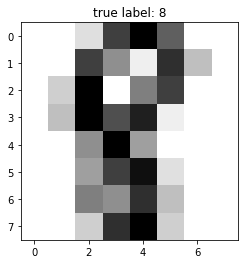

In [51]:
# %load solutions/keras_loss_on_test_set.py
sample_idx = 42
plt.imshow(scaler.inverse_transform(X_test[sample_idx]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("true label: %d" % y_test[sample_idx])

# Compute all probabilities for all samples in the test set at
# once:
probabilities = model.predict_proba(X_test, verbose=0)

print("Predicted probability distribution for sample #42:")
for class_idx, prob in enumerate(probabilities[sample_idx]):
    print("%d: %0.5f" % (class_idx, prob))
print()
    
print("Likelihood of true class for sample #42:")
print(probabilities[sample_idx, y_test[sample_idx]])
print()

print("Average negative loglikelihood of the test set:")
Y_test = to_categorical(y_test)
loglikelihoods = np.sum(np.log(probabilities) * Y_test, axis=1)
print(-np.mean(loglikelihoods))

# Analysis
#
# Depending on the random init, the 2 hidden layers net trained with
# adam seem to converge to a training loss very close to zero when
# given enough epochs (the accuracy on the training set is 100%).
# This model is therefore not underfitting: it has enough capacity
# to perfectly memorise the full training set.
#
# On the test set the negative log likelihood is also close to zero
# but never as much as on the training set (~= 0.07) even after
# increasing the maximum number of epochs. The model is therefore
# overfitting as little.

## d) Home assignment: impact of initialization

Let us now study the impact of a bad initialization when training
a deep feed forward network.

By default Keras dense layers use the "Glorot Uniform" initialization
strategy to initialize the weight matrices:

- each weight coefficient is randomly sampled from [-scale, scale]
- scale is proportional to $\frac{1}{\sqrt{n_{in} + n_{out}}}$

This strategy is known to work well to initialize deep neural networks
with "tanh" or "relu" activation functions and then trained with
standard SGD.

To assess the impact of initialization let us plug an alternative init
scheme into a 2 hidden layers networks with "tanh" activations.
For the sake of the example let's use normal distributed weights
with a manually adjustable scale (standard deviation) and see the
impact the scale value:

In [52]:
from keras import initializations

def normal_init(shape, name=None):
    return initializations.normal(shape, scale=0.01, name=name)


model = Sequential()
model.add(Dense(H, input_dim=N, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train,
                    nb_epoch=10, batch_size=32)

Epoch 1/10
1527/1527 [==============================] - 1s - loss: 2.3033     
Epoch 2/10
1527/1527 [==============================] - 0s - loss: 2.3027     
Epoch 3/10
1527/1527 [==============================] - 0s - loss: 2.3014     
Epoch 4/10
1527/1527 [==============================] - 0s - loss: 2.2959     
Epoch 5/10
1527/1527 [==============================] - 0s - loss: 2.2006     
Epoch 6/10
1527/1527 [==============================] - 0s - loss: 1.8781     
Epoch 7/10
1527/1527 [==============================] - 0s - loss: 1.7445     
Epoch 8/10
1527/1527 [==============================] - 0s - loss: 1.5760     
Epoch 9/10
1527/1527 [==============================] - 0s - loss: 1.3289     
Epoch 10/10
1527/1527 [==============================] - 0s - loss: 1.1389     


#### Questions:

- Try the following initialization schemes and see whether
  the SGD algorithm can successfully train the network or
  not:
  
  - a very small e.g. `scale=1e-3`
  - a larger scale e.g. `scale=1` or `10`
  - initialize all weights to 0 (constant initialization)
  
- What do you observe? Can you find an explanation for those
  outcomes?

- Are better solvers such as SGD with momentum or Adam able
  to deal better with such bad initializations?

#### Initialization schemes

$scale = 1e-3$

In [53]:
def normal_init(shape, name=None):
    return initializations.normal(shape, scale=1e-3, name=name)

model = Sequential()
model.add(Dense(H, input_dim=N, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train,
                    nb_epoch=10, batch_size=32)

Epoch 1/10
1527/1527 [==============================] - 1s - loss: 2.3036     
Epoch 2/10
1527/1527 [==============================] - 0s - loss: 2.3033     
Epoch 3/10
1527/1527 [==============================] - 0s - loss: 2.3031     
Epoch 4/10
1527/1527 [==============================] - 0s - loss: 2.3032     
Epoch 5/10
1527/1527 [==============================] - 0s - loss: 2.3031     
Epoch 6/10
1527/1527 [==============================] - 0s - loss: 2.3030     
Epoch 7/10
1527/1527 [==============================] - 0s - loss: 2.3028     
Epoch 8/10
1527/1527 [==============================] - 0s - loss: 2.3029     
Epoch 9/10
1527/1527 [==============================] - 0s - loss: 2.3028     
Epoch 10/10
1527/1527 [==============================] - 0s - loss: 2.3030     


La perte ne diminue pas. Elle remonte à un moment. C'est lié au fait que le 0 est un point-selle pour l'étape d'optimisation: une plus faible variance pour l'échantillonage (gaussien centré) d'initialisation entraîne donc des valeurs plus resserrées autour de 0, et donc des gradients plus petits.

$scale = 1$

In [54]:
def normal_init(shape, name=None):
    return initializations.normal(shape, scale=1, name=name)

model = Sequential()
model.add(Dense(H, input_dim=N, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train,
                    nb_epoch=10, batch_size=32)

Epoch 1/10
1527/1527 [==============================] - 1s - loss: 3.4706     
Epoch 2/10
1527/1527 [==============================] - 0s - loss: 2.0372     
Epoch 3/10
1527/1527 [==============================] - 0s - loss: 1.4987     
Epoch 4/10
1527/1527 [==============================] - 0s - loss: 1.2203     
Epoch 5/10
1527/1527 [==============================] - 0s - loss: 1.0536     
Epoch 6/10
1527/1527 [==============================] - 0s - loss: 0.9402     
Epoch 7/10
1527/1527 [==============================] - 0s - loss: 0.8603     
Epoch 8/10
1527/1527 [==============================] - 0s - loss: 0.7954     
Epoch 9/10
1527/1527 [==============================] - 0s - loss: 0.7458     
Epoch 10/10
1527/1527 [==============================] - 0s - loss: 0.7034     


La perte diminue plus rapidement que pour l'autre paramètre de scaling.

$scale = 10$

In [55]:
def normal_init(shape, name=None):
    return initializations.normal(shape, scale=10, name=name)

model = Sequential()
model.add(Dense(H, input_dim=N, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train,
                    nb_epoch=10, batch_size=32)

Epoch 1/10
1527/1527 [==============================] - 1s - loss: 14.2148     
Epoch 2/10
1527/1527 [==============================] - 0s - loss: 14.1217     
Epoch 3/10
1527/1527 [==============================] - 0s - loss: 14.1014     
Epoch 4/10
1527/1527 [==============================] - 0s - loss: 14.0511     
Epoch 5/10
1527/1527 [==============================] - 0s - loss: 14.0303     
Epoch 6/10
1527/1527 [==============================] - 0s - loss: 14.0276     
Epoch 7/10
1527/1527 [==============================] - 0s - loss: 13.9967     
Epoch 8/10
1527/1527 [==============================] - 0s - loss: 13.9858     
Epoch 9/10
1527/1527 [==============================] - 0s - loss: 13.9543     
Epoch 10/10
1527/1527 [==============================] - 0s - loss: 13.9523     


Là, la variance est trop grande puisque la perte commence très grande et diminue assez peu.

Initialisation à zéro

In [56]:
model = Sequential()
model.add(Dense(H, input_dim=N, init='zero'))
model.add(Activation("tanh"))
model.add(Dense(K, init='zero'))
model.add(Activation("tanh"))
model.add(Dense(K, init='zero'))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train,
                    nb_epoch=10, batch_size=32)

Epoch 1/10
1527/1527 [==============================] - 1s - loss: 2.3036     
Epoch 2/10
1527/1527 [==============================] - 0s - loss: 2.3032     
Epoch 3/10
1527/1527 [==============================] - 0s - loss: 2.3030     
Epoch 4/10
1527/1527 [==============================] - 0s - loss: 2.3030     
Epoch 5/10
1527/1527 [==============================] - 0s - loss: 2.3029     
Epoch 6/10
1527/1527 [==============================] - 0s - loss: 2.3031     
Epoch 7/10
1527/1527 [==============================] - 0s - loss: 2.3029     
Epoch 8/10
1527/1527 [==============================] - 0s - loss: 2.3029     
Epoch 9/10
1527/1527 [==============================] - 0s - loss: 2.3030     
Epoch 10/10
1527/1527 [==============================] - 0s - loss: 2.3030     


Comme on pouvait s'y attendre, la fonction de perte ne diminue pas, on est sur un point-selle.

Affichons sur un même graphe les courbes de loss pour différentes scales :

Epoch 1/15
1527/1527 [==============================] - 1s - loss: 2.3035     
Epoch 2/15
1527/1527 [==============================] - 0s - loss: 2.3031     
Epoch 3/15
1527/1527 [==============================] - 0s - loss: 2.3031     
Epoch 4/15
1527/1527 [==============================] - 0s - loss: 2.3031     
Epoch 5/15
1527/1527 [==============================] - 0s - loss: 2.3030     
Epoch 6/15
1527/1527 [==============================] - 0s - loss: 2.3031     
Epoch 7/15
1527/1527 [==============================] - 0s - loss: 2.3030     
Epoch 8/15
1527/1527 [==============================] - 0s - loss: 2.3030     
Epoch 9/15
1527/1527 [==============================] - 0s - loss: 2.3030     
Epoch 10/15
1527/1527 [==============================] - 0s - loss: 2.3030     
Epoch 11/15
1527/1527 [==============================] - 0s - loss: 2.3032     
Epoch 12/15
1527/1527 [==============================] - 0s - loss: 2.3030     
Epoch 13/15
1527/1527 [==========================

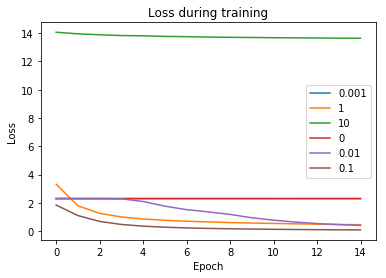

In [58]:
histories = {}
scales = [0.001, 1, 10, 0, 0.01, 0.1]

for scale in scales:
    def normal_init(shape, name=None):
        return initializations.normal(shape, scale=scale, name=name)
    
    model = Sequential()
    model.add(Dense(H, input_dim=N, init=normal_init))
    model.add(Activation("tanh"))
    model.add(Dense(K, init=normal_init))
    model.add(Activation("tanh"))
    model.add(Dense(K, init=normal_init))
    model.add(Activation("softmax"))

    model.compile(optimizer=optimizers.SGD(lr=0.1),
                  loss='categorical_crossentropy')

    history = model.fit(X_train, Y_train,
                        nb_epoch=15, batch_size=32)    
    histories[scale] = history
    
t = np.arange(0, 15)
for scale in scales:
    plt.plot(t, histories[scale].history['loss'], label=scale)
plt.legend()
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#### Adam optimizer + SGD with momentum

$scale = 1e-3$

In [59]:
def normal_init(shape, name=None):
    return initializations.normal(shape, scale=1e-3, name=name)

model = Sequential()
model.add(Dense(H, input_dim=N, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train,
                    nb_epoch=10, batch_size=32)

Epoch 1/10
1527/1527 [==============================] - 1s - loss: 2.2244     
Epoch 2/10
1527/1527 [==============================] - 0s - loss: 1.9594     
Epoch 3/10
1527/1527 [==============================] - 0s - loss: 1.8401     
Epoch 4/10
1527/1527 [==============================] - 0s - loss: 1.7967     
Epoch 5/10
1527/1527 [==============================] - 0s - loss: 1.7694     
Epoch 6/10
1527/1527 [==============================] - 0s - loss: 1.7542     
Epoch 7/10
1527/1527 [==============================] - 0s - loss: 1.7447     
Epoch 8/10
1527/1527 [==============================] - 0s - loss: 1.7235     
Epoch 9/10
1527/1527 [==============================] - 0s - loss: 1.6890     
Epoch 10/10
1527/1527 [==============================] - 0s - loss: 1.6464     


In [60]:
def normal_init(shape, name=None):
    return initializations.normal(shape, scale=1e-3, name=name)

model = Sequential()
model.add(Dense(H, input_dim=N, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1,nesterov=True,momentum=0.99),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train,
                    nb_epoch=10, batch_size=32)

Epoch 1/10
1527/1527 [==============================] - 1s - loss: 2.3231     
Epoch 2/10
1527/1527 [==============================] - 0s - loss: 2.3299     
Epoch 3/10
1527/1527 [==============================] - 0s - loss: 2.3314     
Epoch 4/10
1527/1527 [==============================] - 0s - loss: 1.9735     
Epoch 5/10
1527/1527 [==============================] - 0s - loss: 0.9090     
Epoch 6/10
1527/1527 [==============================] - 0s - loss: 0.9129     
Epoch 7/10
1527/1527 [==============================] - 0s - loss: 0.9500     
Epoch 8/10
1527/1527 [==============================] - 0s - loss: 0.8123     
Epoch 9/10
1527/1527 [==============================] - 0s - loss: 1.0300     
Epoch 10/10
1527/1527 [==============================] - 0s - loss: 0.9733     


Adam et SGD avec momentum de Nesterov (paramètre de momentum = 0.99) gèrent mieux une mauvaise initialisation (proche de 0). Ce dernier est même meilleur que Adam.

$scale=10$

In [61]:
def normal_init(shape, name=None):
    return initializations.normal(shape, scale=10, name=name)

model = Sequential()
model.add(Dense(H, input_dim=N, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train,
                    nb_epoch=10, batch_size=32)

Epoch 1/10
1527/1527 [==============================] - 1s - loss: 14.1038     
Epoch 2/10
1527/1527 [==============================] - 0s - loss: 13.9884     
Epoch 3/10
1527/1527 [==============================] - 0s - loss: 13.9570     
Epoch 4/10
1527/1527 [==============================] - 0s - loss: 13.9398     
Epoch 5/10
1527/1527 [==============================] - 0s - loss: 13.9222     
Epoch 6/10
1527/1527 [==============================] - 0s - loss: 13.9100     
Epoch 7/10
1527/1527 [==============================] - 0s - loss: 13.9124     
Epoch 8/10
1527/1527 [==============================] - 0s - loss: 13.8988     
Epoch 9/10
1527/1527 [==============================] - 0s - loss: 13.8844     
Epoch 10/10
1527/1527 [==============================] - 0s - loss: 13.8693     


In [62]:
def normal_init(shape, name=None):
    return initializations.normal(shape, scale=10, name=name)

model = Sequential()
model.add(Dense(H, input_dim=N, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, init=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1,nesterov=True,momentum=0.99),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train,
                    nb_epoch=20, batch_size=32)

Epoch 1/20
1527/1527 [==============================] - 1s - loss: 12.8954     
Epoch 2/20
1527/1527 [==============================] - 0s - loss: 11.1614     
Epoch 3/20
1527/1527 [==============================] - 0s - loss: 10.1942     
Epoch 4/20
1527/1527 [==============================] - 0s - loss: 9.2012     
Epoch 5/20
1527/1527 [==============================] - 0s - loss: 8.6061     
Epoch 6/20
1527/1527 [==============================] - 0s - loss: 7.9265     
Epoch 7/20
1527/1527 [==============================] - 0s - loss: 7.0907     
Epoch 8/20
1527/1527 [==============================] - 0s - loss: 6.3584     
Epoch 9/20
1527/1527 [==============================] - 0s - loss: 6.1700     
Epoch 10/20
1527/1527 [==============================] - 0s - loss: 5.7306     
Epoch 11/20
1527/1527 [==============================] - 0s - loss: 5.6950     
Epoch 12/20
1527/1527 [==============================] - 0s - loss: 5.9236     
Epoch 13/20
1527/1527 [=======================

En revanche, une initialisation plus éparse semble être toujours un obstacle à la convergence de l'algorithme Adam. Pour le SGD de Nesterov, la convergence est plus lente, mais elle existe.

In [63]:
# %load solutions/keras_initializations.py

In [64]:
# %load solutions/keras_initializations_analysis.py

# II) Numpy Implementation

## a) Logistic Regression

In this section we will implement a logistic regression model trainable with SGD using numpy. Here are the objectives:

1/ Implement a simple forward model with no hidden layer (equivalent to a logistic regression):
note: shape, transpose of W with regards to course
$y = softmax(\mathbf{W} \dot x + b)$

2/ build a predict function which returns the most probable class given an input $x$

3/ build an accuracy function for a batch of inputs $X$ and the corresponding expected outputs $y_{true}$

4/ build a grad function which computes $\frac{d}{dW} -\log(softmax(W \dot x + b))$ for an $x$ and its corresponding expected output $y_{true}$ ; check that the gradients are well defined

5/ build a train function which uses the grad function output to update $\mathbf{W}$ and $b$


First let's define a helper function to compute the one hot encoding of an integer array for a fixed number of classes (similar to keras' `to_categorical`):

In [65]:
def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

In [66]:
one_hot(10, 3)

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [67]:
one_hot(10, [0, 4, 9, 1])

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

Now let's implement the softmax vector function:

$$
softmax(\mathbf{x}) = \frac{1}{\sum_{i=1}^{n}{e^{x_i}}}
\cdot
\begin{bmatrix}
  e^{x_1}\\\\
  e^{x_2}\\\\
  \vdots\\\\
  e^{x_n}
\end{bmatrix}
$$

In [68]:
def softmax(X):
    exp=np.exp(X)
    return exp / np.sum(exp, axis=-1, keepdims=True)

Make sure that this works one vector at a time (and check that the components sum to one):

In [69]:
print(softmax([10, 2, -3]))

[  9.99662391e-01   3.35349373e-04   2.25956630e-06]


Note that a naive implementation of softmax might not be able process a batch of activations in a single call:

In [70]:
X = np.array([[10, 2, -3],
              [-1, 5, -20]])
print(softmax(X))

[[  9.99662391e-01   3.35349373e-04   2.25956630e-06]
 [  2.47262316e-03   9.97527377e-01   1.38536042e-11]]


Here is a way to implement softmax that works both for an individal vector of activations and for a batch of activation vectors at once:

In [71]:
def softmax(X):
    exp = np.exp(X)
    return exp / np.sum(exp, axis=-1, keepdims=True)


print("softmax of a single vector:")
print(softmax([10, 2, -3]))
print(np.sum(softmax([10, 2, -3])))

softmax of a single vector:
[  9.99662391e-01   3.35349373e-04   2.25956630e-06]
1.0


In [72]:
print("sotfmax of 2 vectors:")
X = np.array([[10, 2, -3],
              [-1, 5, -20]])
print(softmax(X))
print(np.sum(softmax(X), axis=1))

sotfmax of 2 vectors:
[[  9.99662391e-01   3.35349373e-04   2.25956630e-06]
 [  2.47262316e-03   9.97527377e-01   1.38536042e-11]]
[ 1.  1.]


Implement a function that given the true one-hot encoded class `Y_true` and and some predicted probabilities `Y_pred` returns the negative log likelihood.

In [73]:
EPSILON= 1e-8

def nll(Y_true, Y_pred):
    Y_true, Y_pred = np.atleast_2d(Y_true), np.atleast_2d(Y_pred)
    loglikelihood=np.sum(np.log(EPSILON + Y_pred)*Y_true,axis=1)
    return -np.mean(loglikelihood)


# Make sure that it works for a simple sample at a time
print(nll([1, 0, 0], [.99, 0.01, 0]))

0.0100503257525


Check that the nll of a very confident yet bad prediction is a much higher positive number:

In [74]:
print(nll([1, 0, 0], [0.01, 0.01, .98]))

4.60516918599


Make sure that your implementation can compute the average negative log likelihood of a group of predictions: `Y_pred` and `Y_true` can therefore be past as 2D arrays:

In [75]:
# Check that the average NLL of the following 3 almost perfect
# predictions is close to 0
Y_true = np.array([[0, 1, 0],
                   [1, 0, 0],
                   [0, 0, 1]])

Y_pred = np.array([[0,   1,    0],
                   [.99, 0.01, 0],
                   [0,   0,    1]])

print(nll(Y_true, Y_pred))

0.0033501019175


In [76]:
# %load solutions/numpy_nll.py

Let us now study the following linear model trainable by SGD, **one sample at a time**.

In [77]:
class LogisticRegression():

    def __init__(self, input_size, output_size):
        self.W = np.random.uniform(size=(input_size, output_size),
                                   high=0.1, low=-0.1)
        self.b = np.random.uniform(size=output_size,
                                   high=0.1, low=-0.1)
        self.output_size = output_size
        
    def forward(self, X):
        Z = np.dot(X, self.W) + self.b
        return softmax(Z)
    
    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)
    
    def grad_loss(self, x, y_true):
        y_pred = self.forward(x)
        dnll_output =  y_pred - one_hot(self.output_size, y_true)
        grad_W = np.outer(x, dnll_output)
        grad_b = dnll_output
        grads = {"W": grad_W, "b": grad_b}
        return grads
    
    def train(self, x, y, learning_rate):
        # Traditional SGD update without momentum
        grads = self.grad_loss(x, y)
        self.W = self.W - learning_rate * grads["W"]
        self.b = self.b - learning_rate * grads["b"]      
        
    def loss(self, x, y):
        return nll(one_hot(self.output_size, y), self.forward(x))

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)

In [78]:
# Build a model and test its forward inference
n_features = X_train.shape[1]
n_classes = Y_train.shape[1]
lr = LogisticRegression(n_features, n_classes)

print("Evaluation of the untrained model:")
train_loss = lr.loss(X_train, y_train)
train_acc = lr.accuracy(X_train, y_train)
test_acc = lr.accuracy(X_train, y_train)

print("train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (train_loss, train_acc, test_acc))

Evaluation of the untrained model:
train loss: 2.4825, train acc: 0.069, test acc: 0.069


5


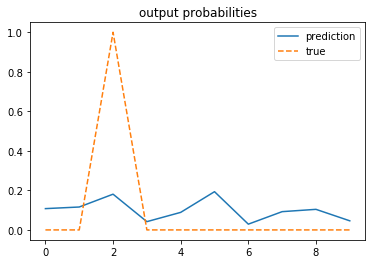

In [79]:
# Test the untrained model on the first example
sample_idx = 0
plt.plot(lr.forward(X_train[sample_idx]), linestyle='-', label='prediction')
plt.plot(one_hot(10, y_train[sample_idx]), linestyle='--', label='true')
plt.title('output probabilities')
plt.legend()
print(lr.predict(X_train[sample_idx]))

In [80]:
# Training for one epoch
learning_rate = 0.01

for i, (x, y) in enumerate(zip(X_train, y_train)):
    lr.train(x, y, learning_rate)
    if i % 100 == 0:
        train_loss = lr.loss(X_train, y_train)
        train_acc = lr.accuracy(X_train, y_train)
        test_acc = lr.accuracy(X_test, y_test)
        print("Update #%d, train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
              % (i, train_loss, train_acc, test_acc))

Update #0, train loss: 2.4585, train acc: 0.095, test acc: 0.111
Update #100, train loss: 1.3259, train acc: 0.709, test acc: 0.726
Update #200, train loss: 0.8466, train acc: 0.862, test acc: 0.900
Update #300, train loss: 0.6284, train acc: 0.908, test acc: 0.926
Update #400, train loss: 0.5210, train acc: 0.909, test acc: 0.922
Update #500, train loss: 0.4512, train acc: 0.926, test acc: 0.930
Update #600, train loss: 0.3947, train acc: 0.930, test acc: 0.926
Update #700, train loss: 0.3590, train acc: 0.934, test acc: 0.944
Update #800, train loss: 0.3388, train acc: 0.936, test acc: 0.952
Update #900, train loss: 0.3131, train acc: 0.942, test acc: 0.956
Update #1000, train loss: 0.2939, train acc: 0.949, test acc: 0.952
Update #1100, train loss: 0.2750, train acc: 0.950, test acc: 0.952
Update #1200, train loss: 0.2627, train acc: 0.954, test acc: 0.970
Update #1300, train loss: 0.2531, train acc: 0.955, test acc: 0.952
Update #1400, train loss: 0.2424, train acc: 0.959, test acc

2


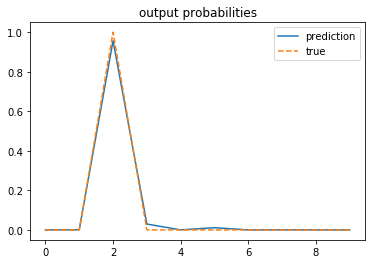

In [81]:
# Evaluate the trained model on the first example
sample_idx = 0
plt.plot(lr.forward(X_train[sample_idx]), linestyle='-', label='prediction')
plt.plot(one_hot(10, y_train[sample_idx]), linestyle='--', label='true')
plt.title('output probabilities')
plt.legend()
print(lr.predict(X_train[sample_idx]))

## b) Feedforward Multilayer

The objective of this section is to implement the backpropagation algorithm (SGD with the chain rule) on a single layer neural network using the sigmoid activation function.

- Implement the `sigmoid` and its element-wise derivative `dsigmoid` functions:

$$
sigmoid(x) = \frac{1}{1 + e^{-x}}
$$

$$
dsigmoid(x) = sigmoid(x) \cdot (1 - sigmoid(x))
$$

In [84]:
def sigmoid(X):
    sigmo = 1. / (1 + np.exp(-X))
    return sigmo


def dsigmoid(X):
    diffsigmo=sigmoid(X)*(1-sigmoid(X))
    return diffsigmo

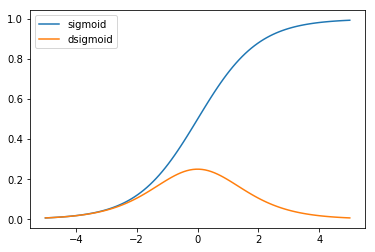

In [85]:
# %load solutions/sigmoid.py
def sigmoid(X):
    return 1 / (1 + np.exp(-X))


def dsigmoid(X):
    sig=sigmoid(X)
    return sig * (1 - sig)


x = np.linspace(-5, 5, 100)
plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x, dsigmoid(x), label='dsigmoid')
plt.legend(loc='best');

- Implement `forward` and `forward_keep_all` functions for a model with a hidden layer, similar to the first one in Keras:
  - $h = sigmoid(\mathbf{W}^h x + b^h)$
  - $y = softmax(\mathbf{W}^o h + b^o)$

Notes: 
  - try to keep the code as similar as possible as the previous one;
  - `forward_keep_activations` is similar to forward, but also returns hidden activations and pre activations;

- update the grad function to compute all gradients; check that the gradients are well defined;

- implement the `train` and `loss` functions.

Bonus: reimplementing all from scratch without looking at the solution of the `LogisticRegression` is an excellent exercise.

In [86]:
W_h = np.random.uniform(low=-0.1,high=0.1,size=(64,20))
b_h = np.zeros(20)
W_o = np.random.uniform(low=-0.1,high=0.1,size=(20,n_classes))
b_o = np.zeros(n_classes)

In [87]:
EPSILON = 1e-8

class NeuralNet():
    """MLP with 1 hidden layer with a sigmoid activation"""
    
    def __init__(self, input_size, hidden_size, output_size,activation,d_activation):
        # TODO
        self.W_h = np.random.uniform(low=-0.1,high=0.1,size=(input_size,hidden_size))
        self.b_h = np.zeros(hidden_size)
        self.W_o = np.random.uniform(low=-0.1,high=0.1,size=(hidden_size,output_size))
        self.b_o = np.zeros(output_size)
        self.output_size = output_size
        self.activation=activation
        self.d_activation=d_activation
        
    def forward(self, X):
        # TODO
        res = self.activation(np.dot(X,self.W_h) + self.b_h)
        res = softmax(np.dot(res,self.W_o) + self.b_o)
        return(res)
        #if len(X.shape) == 1:
        #    res = sigmoid(np.dot(self.W_h.T,X) + self.b_h)
        #    res = sigmoid(np.dot(self.W_o,res) + self.b_o)
        #    return(softmax(res))
        #else:
        #    res = sigmoid(np.dot(self.W_h,X.T) + self.b_h)
        #    res = sigmoid(np.dot(self.W_o,res) + self.b_o)
        #    return(softmax(res))
    
    def forward_keep_activations(self, X):
        # TODO
        #z_h = 0.
        #h = 0.
        #y = np.random.uniform(size=self.output_size,
        #                      high=1.0-EPSILON, low=EPSILON)
        z_h = np.dot(X,self.W_h) + self.b_h
        h = self.activation(z_h)
        pre_y = np.dot(h,self.W_o) + self.b_o
        y = softmax(pre_y)
        return y, h, z_h
    
    def loss(self, X, y):
        # TODO
        return nll(one_hot(self.output_size,y),self.forward(X))

    def grad_loss(self, x, y_true):
        # TODO
        y_pred=self.forward(x)
        with_activations=self.forward_keep_activations(x)
        grad_z0=y_pred-one_hot(self.output_size,y_true)
        grad_w0=np.outer(with_activations[1],grad_z0)
        grad_b0=grad_z0.copy()
        grad_h=np.dot(grad_z0,self.W_o.T)
        grad_zh=grad_h*self.d_activation(with_activations[2])
        grad_wh=np.outer(x,grad_zh)
        grad_bh=grad_zh.copy()
        return {"W_h": grad_wh, "b_h": grad_bh, "W_o": grad_w0, "b_o": grad_b0}

    def train(self, x, y, learning_rate):
        # TODO
        grads=self.grad_loss(x,y)
        self.W_o-=learning_rate*grads["W_o"]
        self.b_o-=learning_rate*grads["b_o"]
        self.W_h-=learning_rate*grads["W_h"]
        self.b_h-=learning_rate*grads["b_h"]

    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)

In [88]:
# %load solutions/neural_net.py

In [89]:
n_hidden = 10
model = NeuralNet(n_features, n_hidden, n_classes,sigmoid,dsigmoid)

In [90]:
model.forward(X_train[1])

array([ 0.11217886,  0.08813383,  0.09415178,  0.10980922,  0.09522911,
        0.09574163,  0.09264938,  0.11026547,  0.09694145,  0.10489928])

In [91]:
model.loss(X_train, y_train)

2.3001826436471133

In [92]:
model.accuracy(X_train, y_train)

0.13294040602488538

0


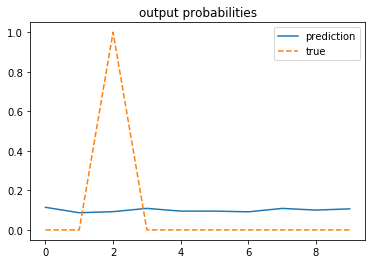

In [93]:
sample_idx = 0
plt.plot(model.forward(X_train[sample_idx]), linestyle='-', label='prediction')
plt.plot(one_hot(10, y_train[sample_idx]), linestyle='--', label='true')
plt.title('output probabilities')
plt.legend()
print(model.predict(X_train[sample_idx]))

In [94]:
losses, accuracies, accuracies_test = [], [], []
losses.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (losses[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)

    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    print("Epoch #%d, train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
          % (epoch + 1, losses[-1], accuracies[-1], accuracies_test[-1]))

Random init: train loss: 2.3002, train acc: 0.133, test acc: 0.111
Epoch #1, train loss: 0.3227, train acc: 0.927, test acc: 0.889
Epoch #2, train loss: 0.1741, train acc: 0.961, test acc: 0.930
Epoch #3, train loss: 0.1234, train acc: 0.973, test acc: 0.933
Epoch #4, train loss: 0.0911, train acc: 0.984, test acc: 0.941
Epoch #5, train loss: 0.0727, train acc: 0.988, test acc: 0.941
Epoch #6, train loss: 0.0566, train acc: 0.991, test acc: 0.941
Epoch #7, train loss: 0.0458, train acc: 0.994, test acc: 0.944
Epoch #8, train loss: 0.0366, train acc: 0.995, test acc: 0.948
Epoch #9, train loss: 0.0315, train acc: 0.997, test acc: 0.948
Epoch #10, train loss: 0.0272, train acc: 0.997, test acc: 0.952
Epoch #11, train loss: 0.0240, train acc: 0.998, test acc: 0.959
Epoch #12, train loss: 0.0217, train acc: 0.998, test acc: 0.956
Epoch #13, train loss: 0.0186, train acc: 0.999, test acc: 0.967
Epoch #14, train loss: 0.0170, train acc: 0.999, test acc: 0.970
Epoch #15, train loss: 0.0152, t

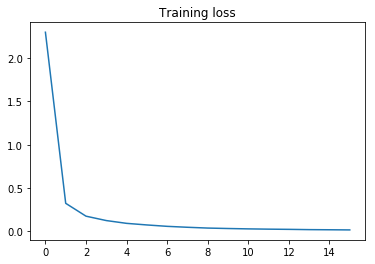

In [95]:
plt.plot(losses)
plt.title("Training loss");

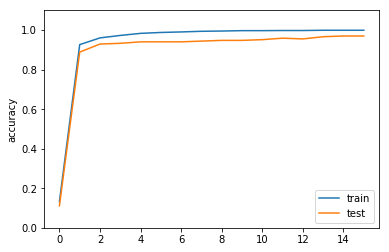

In [96]:
plt.plot(accuracies, label='train')
plt.plot(accuracies_test, label='test')
plt.ylim(0, 1.1)
plt.ylabel("accuracy")
plt.legend(loc='best');

## c) Exercises

### Hyper parameters settings

- Experiment with different hyper parameters:
  - learning rate,
  - size of hidden layer,
  - initialization scheme: test with 0 initialization vs uniform,
  - implement other activation functions,
  - implement the support for a second hidden layer.


### Mini-batches

- Bonus: the current implementations of `train` and `grad_loss` function currently only accept a single sample at a time:
    - implement the support for training with a mini-batch of 32 samples at a time instead of one,
    - experiment with different sizes of batches,
    - monitor the norm of the average gradients on the full training set at the end of each epoch.


### Momentum

- Bonus: Implement momentum

#### Hyperparameter settings

Learning rate

In [97]:
learning_rate_list=[1e-2,1e-1,1,5,10]
losses, accuracies, accuracies_test = [], [], []
losses_temp, accuracies_temp, accuracies_test_temp = [], [], []

for lr in learning_rate_list:
    losses_temp, accuracies_temp, accuracies_test_temp = [], [], []
    for epoch in range(15):
        for i, (x, y) in enumerate(zip(X_train, y_train)):
            model.train(x, y, lr)

        losses_temp.append(model.loss(X_train, y_train))
        accuracies_temp.append(model.accuracy(X_train, y_train))
        accuracies_test_temp.append(model.accuracy(X_test, y_test))
    losses.append(losses_temp)
    accuracies.append(accuracies_temp)
    accuracies_test.append(accuracies_test_temp)

C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


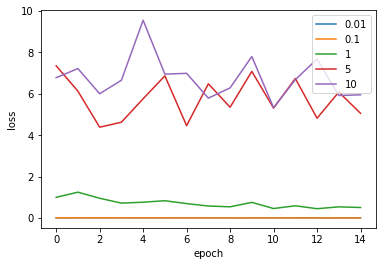

In [98]:
for j in range(len(learning_rate_list)):
    plt.plot(losses[j],label=str(learning_rate_list[j]))
plt.legend(loc='best')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

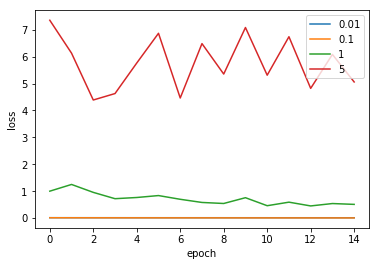

In [99]:
#Zoom 1
for j in range(len(learning_rate_list)-1):
    plt.plot(losses[j],label=str(learning_rate_list[j]))
plt.legend(loc='best')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

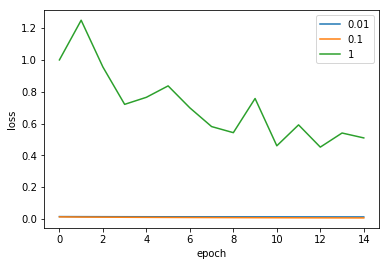

In [100]:
#Zoom 2
for j in range(len(learning_rate_list)-2):
    plt.plot(losses[j],label=str(learning_rate_list[j]))
plt.legend(loc='best')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

We observe that a too low or a too high learning rate has a critical bad impact on the convergence of the optimization step. It appears that there is a trade-off to be found: here, a value of 1 seems to be optimal.

Different hidden layer sizes

In [101]:
listOfHLSizes=[1,5,10,20,30,50]
losses, accuracies, accuracies_test = [], [], []
losses_temp, accuracies_temp, accuracies_test_temp = [], [], []

for hls in listOfHLSizes:
    model = NeuralNet(n_features, hls, n_classes, sigmoid, dsigmoid)
    losses_temp, accuracies_temp, accuracies_test_temp = [], [], []
    for epoch in range(15):
        for i, (x, y) in enumerate(zip(X_train, y_train)):
            model.train(x, y, 0.1)

        losses_temp.append(model.loss(X_train, y_train))
        accuracies_temp.append(model.accuracy(X_train, y_train))
        accuracies_test_temp.append(model.accuracy(X_test, y_test))
    losses.append(losses_temp)
    accuracies.append(accuracies_temp)
    accuracies_test.append(accuracies_test_temp)

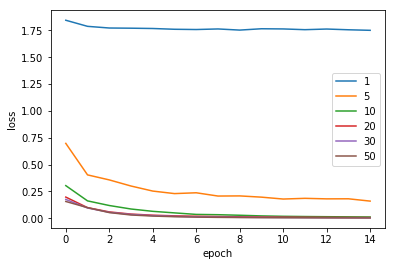

In [102]:
for j in range(len(listOfHLSizes)):
    plt.plot(losses[j],label=str(listOfHLSizes[j]))
plt.legend(loc='best')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

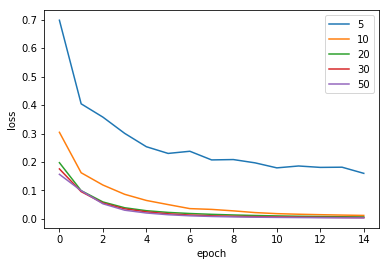

In [103]:
#Zoom 1
for j in range(len(listOfHLSizes)-1):
    plt.plot(losses[j+1],label=str(listOfHLSizes[j+1]))
plt.legend(loc='best')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

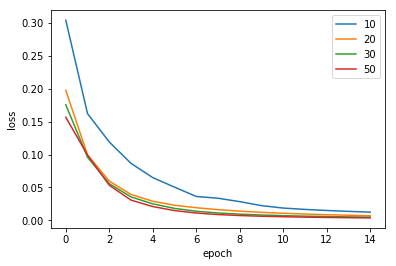

In [104]:
#Zoom 2
for j in range(len(listOfHLSizes)-2):
    plt.plot(losses[j+2],label=str(listOfHLSizes[j+2]))
plt.legend(loc='best')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

On remarque qu'un nombre plus grand de neurones dans la couche cachée entraîne une convergence plus rapide dans la phase d'entraînement. Cependant, il semble également que, passé un certain nombre de neurones, rajouter un neurone dans la couche cachée n'apporte plus d'amélioration significative pour la perte. Egalement, cela donne un coût coputationnel plus élevé.

#### Initialization

Random init: train loss: 2.3026, train acc: 0.099, test acc: 0.100
Random init: train loss: 2.3026, train acc: 0.097, test acc: 0.107


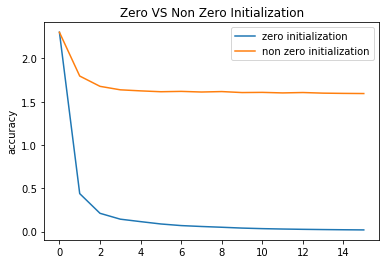

In [112]:
class NeuralNet_non_zero():
    """MLP with 1 hidden layer with a sigmoid activation"""

    def __init__(self, input_size, hidden_size, output_size):
        # TODO
        self.W_h = np.random.uniform(
            size=(input_size, hidden_size), high=0.01, low=-0.01)
        self.b_h = np.zeros(hidden_size)
        self.W_o = np.random.uniform(
            size=(hidden_size, output_size), high=0.01, low=-0.01)
        self.b_o =np.zeros(output_size)
        # END TODO
        self.output_size = output_size
        
    def forward(self, X):
        # TODO
        h = sigmoid(np.dot(X, self.W_h) + self.b_h)
        y = softmax(np.dot(h, self.W_o) + self.b_o)
        # END TODO
        return y
    
    def forward_keep_activations(self, X):
        # TODO
        z_h = np.dot(X, self.W_h) + self.b_h
        h = sigmoid(z_h)
        z_o = np.dot(h, self.W_o) + self.b_o
        y = softmax(z_o)
        return y, h, z_h
    
    def loss(self, X, y):
        # TODO
        return nll(one_hot(self.output_size, y), self.forward(X))

    def grad_loss(self, X, y_true):
        # TODO
        y, h, z_h = self.forward_keep_activations(X)
        grad_z_o = y - one_hot(self.output_size, y_true)

        grad_W_o = np.outer(h, grad_z_o)
        grad_b_o = grad_z_o
        grad_h = np.dot(grad_z_o, np.transpose(self.W_o))
        grad_z_h = grad_h * dsigmoid(z_h)
        grad_W_h = np.outer(x, grad_z_h)
        grad_b_h = grad_z_h
        grads = {"W_h": grad_W_h, "b_h": grad_b_h,
                 "W_o": grad_W_o, "b_o": grad_b_o}
        return grads

    def train(self, x, y, learning_rate):
        # TODO
        grads = self.grad_loss(x, y)
        self.W_h = self.W_h - learning_rate * grads["W_h"]
        self.b_h = self.b_h - learning_rate * grads["b_h"]
        self.W_o = self.W_o - learning_rate * grads["W_o"]
        self.b_o = self.b_o - learning_rate * grads["b_o"]

    def predict(self, X):
        # TODO
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        # TODO
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)
    
class NeuralNet_zero():
    """MLP with 1 hidden layer with a sigmoid activation"""

    def __init__(self, input_size, hidden_size, output_size):
        # TODO
        a = (input_size, hidden_size)
        self.W_h = np.zeros(a)
        self.b_h = np.zeros(hidden_size)
        a = (hidden_size, output_size)
        self.W_o = np.zeros(a)
        self.b_o =np.zeros(output_size)
        # END TODO
        self.output_size = output_size
        
    def forward(self, X):
        # TODO
        h = sigmoid(np.dot(X, self.W_h) + self.b_h)
        y = softmax(np.dot(h, self.W_o) + self.b_o)
        # END TODO
        return y
    
    def forward_keep_activations(self, X):
        # TODO
        z_h = np.dot(X, self.W_h) + self.b_h
        h = sigmoid(z_h)
        z_o = np.dot(h, self.W_o) + self.b_o
        y = softmax(z_o)
        return y, h, z_h
    
    def loss(self, X, y):
        # TODO
        return nll(one_hot(self.output_size, y), self.forward(X))

    def grad_loss(self, X, y_true):
        # TODO
        y, h, z_h = self.forward_keep_activations(X)
        grad_z_o = y - one_hot(self.output_size, y_true)

        grad_W_o = np.outer(h, grad_z_o)
        grad_b_o = grad_z_o
        grad_h = np.dot(grad_z_o, np.transpose(self.W_o))
        grad_z_h = grad_h * dsigmoid(z_h)
        grad_W_h = np.outer(x, grad_z_h)
        grad_b_h = grad_z_h
        grads = {"W_h": grad_W_h, "b_h": grad_b_h,
                 "W_o": grad_W_o, "b_o": grad_b_o}
        return grads

    def train(self, x, y, learning_rate):
        # TODO
        grads = self.grad_loss(x, y)
        self.W_h = self.W_h - learning_rate * grads["W_h"]
        self.b_h = self.b_h - learning_rate * grads["b_h"]
        self.W_o = self.W_o - learning_rate * grads["W_o"]
        self.b_o = self.b_o - learning_rate * grads["b_o"]

    def predict(self, X):
        # TODO
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        # TODO
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)
    
model = NeuralNet_zero(n_features, n_hidden, n_classes)

losses_zero, accuracies, accuracies_test = [], [], []
losses_zero.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (losses[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)

    losses_zero.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    
# plt.plot(losses, label='train')
# # plt.ylim(0, 1.1)
# plt.ylabel("accuracy")
# plt.legend(loc='best')
# plt.title('Uniform Intitialization')
# plt.show()

model = NeuralNet_non_zero(n_features, n_hidden, n_classes)

losses_non_zero, accuracies, accuracies_test = [], [], []
losses_non_zero.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (losses[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)

    losses_non_zero.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    
plt.plot(losses_non_zero, label='zero initialization')
plt.plot(losses_zero, label='non zero initialization')
# plt.ylim(0, 1.1)
plt.ylabel("accuracy")
plt.legend(loc='best')
plt.title('Zero VS Non Zero Initialization')
plt.show()

On retrouve, comme vu dans la partie précédente, qu'une initialisation à zéro empêche l'algorithme de converger.

#### Activation functions

In [113]:
#tanh
def tanh(x):
    return (np.exp(2*x)-1)/(np.exp(2*x)+1)

def dtanh(x):
    return 1-tanh(x)**2

def relu(x):
    return np.maximum(x,0)

def drelu(x):
    return np.float64(x>0)

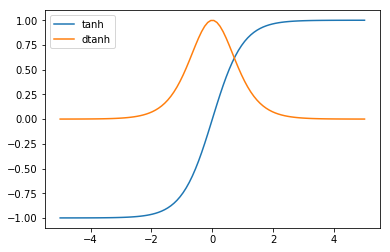

In [114]:
#tanh
x = np.linspace(-5, 5, 100)
plt.plot(x, tanh(x), label='tanh')
plt.plot(x, dtanh(x), label='dtanh')
plt.legend(loc='best');

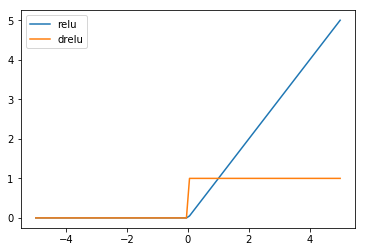

In [115]:
#relu
x = np.linspace(-5, 5, 100)
plt.plot(x, relu(x), label='relu')
plt.plot(x, drelu(x), label='drelu')
plt.legend(loc='best');

In [116]:
listOfActivationFunctions=[sigmoid,tanh,relu]
listOfDiffActivationFunctions=[dsigmoid,dtanh,drelu]
losses, accuracies, accuracies_test = [], [], []
losses_temp, accuracies_temp, accuracies_test_temp = [], [], []

for i in range(len(listOfActivationFunctions)):
    model = NeuralNet(n_features, 20, n_classes,listOfActivationFunctions[i],listOfDiffActivationFunctions[i])
    losses_temp, accuracies_temp, accuracies_test_temp = [], [], []
    for epoch in range(15):
        for i, (x, y) in enumerate(zip(X_train, y_train)):
            model.train(x, y, 0.01)

        losses_temp.append(model.loss(X_train, y_train))
        accuracies_temp.append(model.accuracy(X_train, y_train))
        accuracies_test_temp.append(model.accuracy(X_test, y_test))
    losses.append(losses_temp)
    accuracies.append(accuracies_temp)
    accuracies_test.append(accuracies_test_temp)

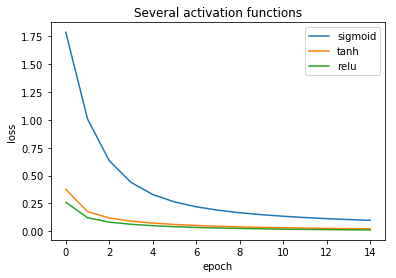

In [118]:
listOfActivationFunctions2=["sigmoid","tanh","relu"]
for j in range(len(listOfActivationFunctions)):
    plt.plot(losses[j],label=str(listOfActivationFunctions2[j]))
plt.legend(loc='best')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title('Several activation functions')
plt.show()

#### Second hidden layer

Random init: train loss: 2.3028, train acc: 0.102, test acc: 0.096
Random init: train loss: 2.3026, train acc: 0.102, test acc: 0.096


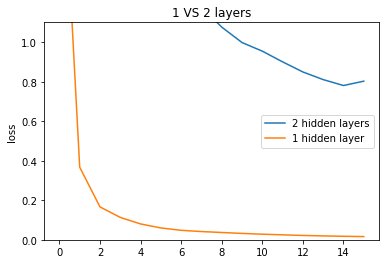

In [132]:
class NeuralNet_two_layers():
    """MLP with 1 hidden layer with a sigmoid activation"""

    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        # TODO
        self.W_h_1 = np.random.uniform(
            size=(input_size, hidden_size_1), high=0.01, low=-0.01)
        self.b_h_1 = np.zeros(hidden_size_1)
        self.W_h_2 = np.random.uniform(
            size=(hidden_size_1, hidden_size_2), high=0.01, low=-0.01)
        self.b_h_2 = np.zeros(hidden_size_2)        
        
        self.W_o = np.random.uniform(
            size=(hidden_size_2, output_size), high=0.01, low=-0.01)
        self.b_o =np.zeros(output_size)
        # END TODO
        self.output_size = output_size
        
    def forward(self, X):
        # TODO
        h_1 = sigmoid(np.dot(X, self.W_h_1) + self.b_h_1)
        h_2 = sigmoid(np.dot(h_1, self.W_h_2) + self.b_h_2)
        y = softmax(np.dot(h_2, self.W_o) + self.b_o)
        # END TODO
        return y
    
    def forward_keep_activations(self, X):
        # TODO
        z_h_1 = np.dot(X, self.W_h_1) + self.b_h_1
        h_1 = sigmoid(z_h_1)
        z_h_2 = np.dot(h_1, self.W_h_2) + self.b_h_2
        h_2 = sigmoid(z_h_2)
        z_o = np.dot(h_2, self.W_o) + self.b_o
        y = softmax(z_o)
        return y, h_1, h_2, z_h_1, z_h_2
    
    def loss(self, X, y):
        # TODO
        return nll(one_hot(self.output_size, y), self.forward(X))

    def grad_loss(self, X, y_true):
        # TODO
        y, h_1, h_2, z_h_1, z_h_2 = self.forward_keep_activations(X)
        grad_z_o = y - one_hot(self.output_size, y_true)

        grad_W_o = np.outer(h_2, grad_z_o)
        grad_b_o = grad_z_o
        
        grad_h_2 = np.dot(grad_z_o, np.transpose(self.W_o))
        grad_z_h_2 = grad_h_2 * dsigmoid(z_h_2)
        grad_W_h_2 = np.outer(h_1, grad_z_h_2)
        grad_b_h_2 = grad_z_h_2
        
        grad_h_1 = np.dot(grad_z_h_2, np.transpose(self.W_h_2))
        grad_z_h_1 = grad_h_1 * dsigmoid(z_h_1)
        grad_W_h_1 = np.outer(x, grad_z_h_1)
        grad_b_h_1 = grad_z_h_1
        
        grads = {"W_h_1": grad_W_h_1, "b_h_1": grad_b_h_1,
                 "W_h_2": grad_W_h_2, "b_h_2": grad_b_h_2,
                 "W_o": grad_W_o, "b_o": grad_b_o}
        return grads

    def train(self, x, y, learning_rate):
        # TODO
        grads = self.grad_loss(x, y)
        self.W_h_1 = self.W_h_1 - learning_rate * grads["W_h_1"]
        self.b_h_1 = self.b_h_1 - learning_rate * grads["b_h_1"]
        self.W_h_2 = self.W_h_2 - learning_rate * grads["W_h_2"]
        self.b_h_2 = self.b_h_1 - learning_rate * grads["b_h_2"]   
        
        self.W_o = self.W_o - learning_rate * grads["W_o"]
        self.b_o = self.b_o - learning_rate * grads["b_o"]

    def predict(self, X):
        # TODO
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        # TODO
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)
    
######### Two layers #########
model = NeuralNet_two_layers(n_features, n_hidden, n_hidden, n_classes)

losses_2, accuracies, accuracies_test = [], [], []
losses_2.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (losses_2[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)

    losses_2.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    
# plt.plot(accuracies, label='train')
# plt.plot(accuracies_test, label='test')
# plt.ylim(0, 1.1)
# plt.ylabel("accuracy")
# plt.legend(loc='best')
# plt.title('Two layers')
# plt.show()

######### One layer #########
model = NeuralNet_non_zero(n_features, n_hidden, n_classes)

losses_1, accuracies, accuracies_test = [], [], []
losses_1.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (losses_1[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)

    losses_1.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    
plt.plot(losses_2, label='2 hidden layers')
plt.plot(losses_1, label='1 hidden layer')
plt.ylim(0, 1.1)
plt.ylabel('loss')
plt.legend(loc='best')
plt.title('1 VS 2 layers')
plt.show()

On observe que la convergence est bien meilleure avec une seule couche cachée qu'avec deux.

# III) TensorFlow Implementation

TensorFlow is a symbolic graph computation engine, that allows automatic differentiation of each node
- https://www.tensorflow.org 
- https://www.tensorflow.org/tutorials/mnist/tf/

TensorFlow builds where nodes may be:
- **constant:** constants tensors, such as a learning rate
- **Variables:** any tensor, such as parameters of the models
- **Placeholders:** placeholders for inputs and outputs of your models
- many other types of nodes (functions, loss, ...)

The graph is symbolic, no computation is performed until a `Session` is defined and the command `run` or `eval` is invoked. TensorFlow may run this computation on (multiple) CPUs or GPUs

In [304]:
import tensorflow as tf

a = tf.constant(3)
b = tf.constant(2)
c = tf.Variable(0)
c = a + b
with tf.Session() as sess:
    print(sess.run(c))

5


In [305]:
X = tf.placeholder("float32", name="input")
Y = X + tf.constant(3.0)
with tf.Session() as sess:
    print(sess.run(Y, feed_dict={X:2}))

5.0


**Note: batches in inputs**
- the first dimension of the input is usually kept for the batch dimension. A typical way to define an input placeholder with a 1D tensor of 128 dimensions, is:
```
X = tf.placeholder("float32", shape=[None, 128])
```

## a) Build a model using TensorFlow

- Using TensorFlow, build a similar model (one hidden layer) as you previously did
- the input will be a batch coming from X_train, and the output will be a batch of ints

In [306]:
# helper functions

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


def accuracy(y_pred, y=y_test):
    return np.mean(np.argmax(y_pred, axis=1) == y)

In [ ]:
# hyperparams
batch_size = 32
hid_size = 15
learning_rate = 0.01
num_epochs = 10
input_size = X_train.shape[1]
output_size = 10

# input and output
X = tf.placeholder("float32", shape=[None, input_size])
y = tf.placeholder("int32", shape=[None])

#todo: build the model and weights

#todo: build the loss, predict, and train operator
# mock loss and b, to change
b = init_weights([output_size])
loss = b

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

#todo: build predict node
predict = X

# Initialization of all variables in the graph
init = tf.global_variables_initializer()

In [ ]:
# %load solutions/tf_model.py

In [ ]:
# run training
with tf.Session() as sess: 
    sess.run(init)
    
    losses = []
    for e in range(num_epochs):
        for i in range(X_train.shape[0] // batch_size):
            # Build batches of batch_size            
            idx, idxn = i * batch_size, min(X_train.shape[0]-1, (i+1) * batch_size)
            batch_xs, batch_ys = X_train[idx: idxn], y_train[idx: idxn]            
            
            # Run train operator and monitor loss
            _, l=sess.run([train_op, loss], feed_dict={X: batch_xs, y: batch_ys})
            losses.append(l)
        
        # For each epoch, run accuracy on train and test
        predicts_test = sess.run(predict, feed_dict={X: X_test})
        predicts_train = sess.run(predict, feed_dict={X: X_train})
        print("epoch: %d train accuracy: %0.3f test accuracy: %0.3f"
              % (e, accuracy(predicts_train, y_train), accuracy(predicts_test)))
    
    # For monitoring purposes
    file_writer = tf.summary.FileWriter('./tensorflow_summaries', sess.graph)    
plt.plot(losses);

## b) Exercises

### Bonus:
- add L2 regularization with $\lambda = 10^{-4}$
- train with arbitrary number of layers by only defining layer sizes
- you may use tensorboard (https://www.tensorflow.org/how_tos/summaries_and_tensorboard/) to monitor loss and display graph
- follow the official tensorflow tutorial: https://www.tensorflow.org/tutorials/mnist/tf/